# Marvelous Data Miners - Final Analysis

In [20]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image 
import gmaps
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

# import api keys for GMaps
from groupkeys import g_keypa

## Question 1 Analysis: What are the top Marvel movie franchises?

In [57]:
final_movies = pd.read_csv("marvel_files/final_movies.csv")
final_movies = final_movies.drop(columns = {'Unnamed: 0'})
final_movies["Release Date"] = pd.to_datetime(final_movies["Release Date"])
final_movies

,Title,Box Office (in 000s),Release Date,Chronology,Duration
0,Avengers: Endgame,2795465.685,2019-04-26,22.0,182
1,Avengers: Infinity War,2048134.200,2018-04-27,20.0,149
2,The Avengers,1517935.897,2012-05-04,7.0,143
3,Avengers: Age of Ultron,1403013.963,2015-05-01,13.0,141
4,Black Panther,1348258.224,2018-02-16,16.0,134
5,Iron Man 3,1215392.272,2013-05-03,8.0,130
6,Captain America: Civil War,1140069.413,2016-05-06,15.0,147
7,Captain Marvel,1126129.839,2019-03-08,2.0,125
8,Spider-Man: Far From Home,1123901.180,2019-07-02,23.0,129
9,Spider-Man: Homecoming,880166.350,2017-07-07,17.0,133


### Box Office Earnings Over Time
- Is box office success increasing due to ticket price inflation, or are specific movies successful?

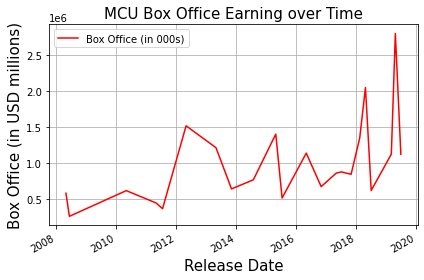

In [58]:
TimeBox = final_movies.plot(kind = "line", x = "Release Date", y = "Box Office (in 000s)", color = "red", grid = True)
TimeBox.set_ylabel("Box Office (in USD millions)", fontsize = 15, color = "black")
TimeBox.set_xlabel("Release Date", fontsize = 15, color = "black")
TimeBox.set_title("MCU Box Office Earning over Time", fontsize = 15, color = "black")
plt.tight_layout()
plt.savefig("marvel_files/earnovertime.png")
plt.show()

**Analysis:** While there is a general increase in the box office returns over time, there are still relative successes and flops. There are 3-4 major peaks of the 22 films while the majority hover between $500k -1.25M. We can conclude that indiviudal movie interest, not time, is the major factor in success of a Marvel movie.

### Earnings by Title
- Can we a trend in the highest earning films?

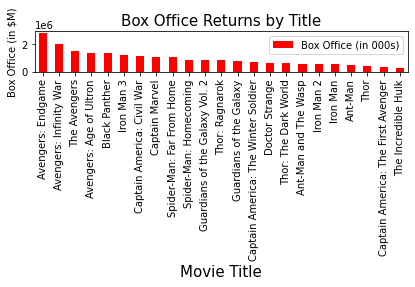

In [66]:
EarnBar = final_movies.plot(kind = "bar", x = "Title", y = "Box Office (in 000s)", color = "red")
EarnBar.set_ylabel("Box Office (in $M)", fontsize = 10, color = "black")
EarnBar.set_xlabel("Movie Title", fontsize = 15, color = "black")
EarnBar.set_title("Box Office Returns by Title", fontsize = 15, color = "black")
plt.tight_layout()
plt.savefig("marvel_files/boxoffice.png")
plt.show()

**Analysis:** There are three major takeaways from this data:
1. "Avengers" movies are far and away the most successful films in the MCU. This supports our hypothesis that **multi-character marvel franchises are more successful than single character films, regardless of demographic.** 
2. Certain characters are more successful than others. Black Panther, Iron Man, Captain America and Spider-Man are 5 of the top 6 non-Avengers titles. **For our remaining analysis we will consider these our "Big 4 Characters."***
3. There is a time effect for some of these characters. For instance, Iron Man and Iron Man 2 are in the bottom 6 of total earnings, but were successful for their release dates. 

Based on the above analysis, when selecting the next "Marvel Star," we will focus on characters that interact with the Big 4 characters. The film title we select should be based on a comic book event that has many characters so we can briefly introduce other new characters to test them to be a future Marvel Star too! 

## Question 2 Analysis: Which characters interact with each other in the Marvel Universe?

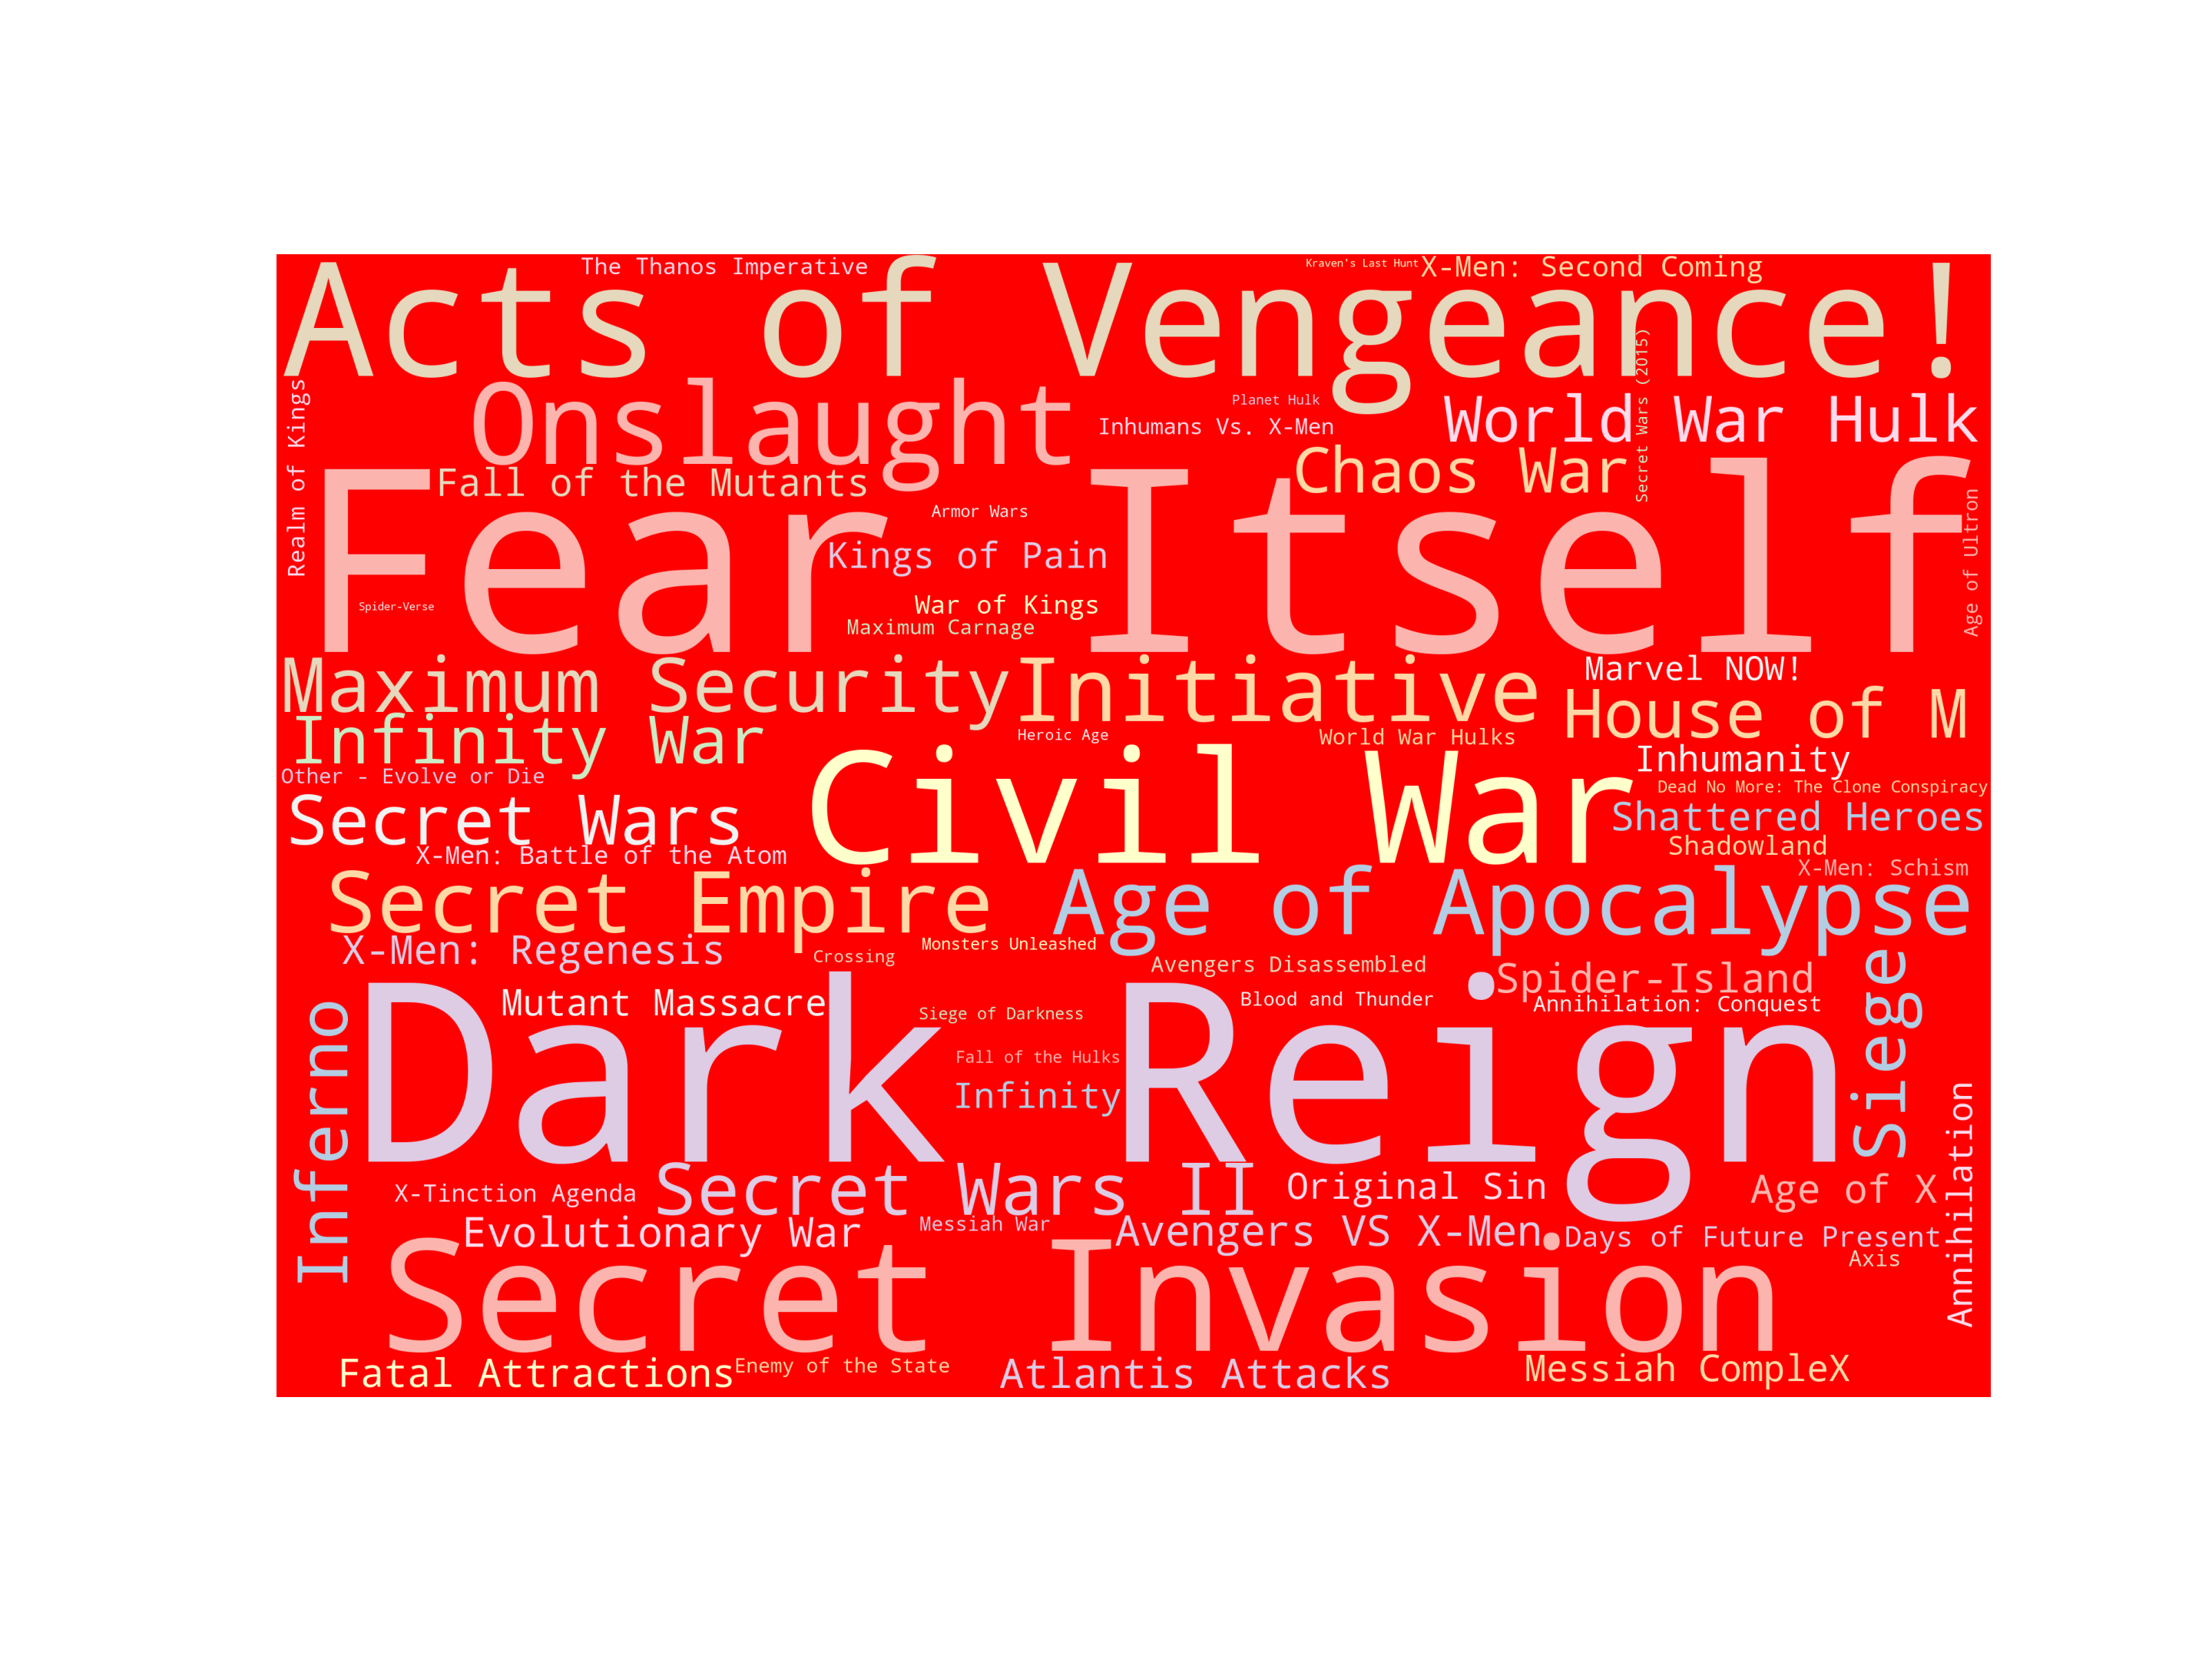

In [41]:
Image("marvel_files/EventCloud.png")

***Insight:*** The above WordCloud represents each of the 74 comic events weighted by the amount of characters in each event. It would appear that the leading candidates for the next movie event would be Fear Itself, Dark Reign, Acts of Vengeance!, or Civil War. We also note that there are many X-Men themed events that we may need to remove from the population.

In [42]:
TenCharDF = pd.read_csv("marvel_files/TenCharDF.csv")
TenCharDF = TenCharDF.set_index('Unnamed: 0')
TenCharDF.index.name = None
TenCharDF

,Event Count,Overlaps w/ Big 4
Hawkeye,14,3
Hercules,11,6
Luke Cage,13,6
Namor,12,4
Scarlet Witch,11,5
She-Hulk,12,3
Spider-Woman,12,4
Tigra,11,5
Vision,11,3
Wasp,11,3


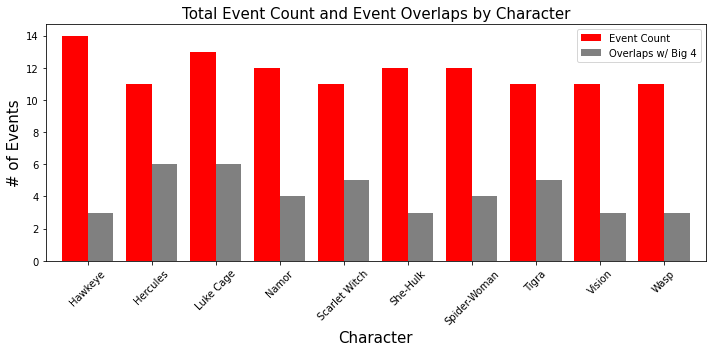

In [43]:
# Create bar chart showing the event count and overlaps with Big 4 for the Top 10 Characters
TenCharPlot = TenCharDF.plot(kind= "bar", color = ["red","gray"], width = .8, rot = 45, figsize = (10, 5))
TenCharPlot.set_xlabel("Character", fontsize = 15, color = "black")
TenCharPlot.set_ylabel("# of Events", fontsize = 15, color = "black")
TenCharPlot.tick_params(colors = "black")
TenCharPlot.set_title("Total Event Count and Event Overlaps by Character", fontsize = 15, color = "black")
TenCharPlot.set_facecolor("white")
plt.tight_layout()
plt.savefig("marvel_files/CharBar.png")
plt.show()

***Analysis***: There are several observations we can make from the above plot:
1. On overall events Hawkeye is the sole leader of the population, followed by Luke Cage and then Namor, She-Hulk, and Spider-Woman.
2. Hawkeye has the fewest amount of overlapping events with the Big 4 characters. This is a disqualifying attribute to be the next Marvel Star.
3. Luke Cage and Hercules have the most events overlapping with the Big 4 characters, however, we believe there is an issue selecting them as Luke Cage has had a recent Netflix series cancelled and Hercules may be confusing to non-Marvel "die-hards" as thy may think it is the Greek mythology character.
4. Of our top event counters, Namor and Spider-Woman are the next best options. 

We will select ***Namor*** as our next Marvel-Star.

In [44]:
EightEventShort = pd.read_csv("marvel_files/EightEventShort.csv")
EightEventShort = EightEventShort.set_index("Event Title")
EightEventShort.index.name = None

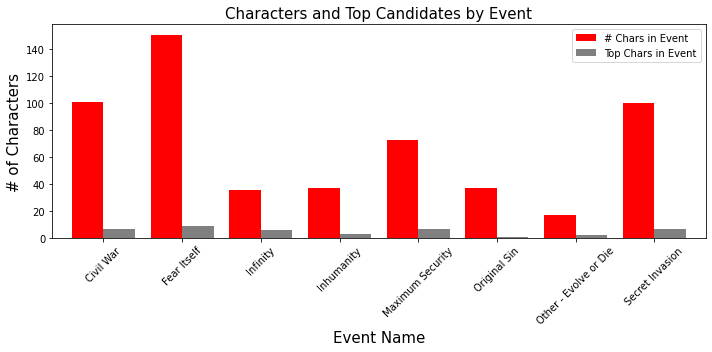

In [45]:
# Create bar chart showing the character count and count of Top 10 Characters
EightEventPlot = EightEventShort.plot(kind= "bar", color = ["red","gray"], width = .8, rot = 45, figsize = (10, 5))
EightEventPlot.set_xlabel("Event Name", fontsize = 15, color = "black")
EightEventPlot.set_ylabel("# of Characters", fontsize = 15, color = "black")
EightEventPlot.tick_params(colors = "black")
EightEventPlot.set_title("Characters and Top Candidates by Event", fontsize = 15, color = "black")
EightEventPlot.set_facecolor("white")
plt.tight_layout()
plt.savefig("marvel_files/EventBar.png")
plt.show()

***Analysis***: Based on our criteria, Fear Itself is far and away the best event to feature in a movie, as it has significantly the most characters in it and the most top characters, especially considering other events that have been referenced in previous films (Civil War; Infinity). Per our DataFrame, we know that 9 of our 10 candidates are in this event, including our Marvel Star pick, Namor.

Our-in-house comic experts will choose a storyline from the ***Fear Itself*** event to make into a movie, which should heavily feature Namor as a lead-in to his own starring role in a future film. We should probably give brief cameos to our other top candidates like Hawkeye and Spider-Woman as well!

## Question 3 Analysis: What would comprise a successful movie release strategy?

### Understanding of Census Data Sets

In [46]:
census = pd.read_csv("marvel_files/census_data_complete.csv")

In [47]:
#calculate mean and sd for normal distribution curve
avg_age = np.mean(census["Median Age"])
sd_age = np.std(census["Median Age"])

avg_pop = np.mean(census["Population"])
sd_pop = np.std(census["Population"])

avg_inc = np.mean(census["Household Income"])
sd_inc = np.std(census["Household Income"])

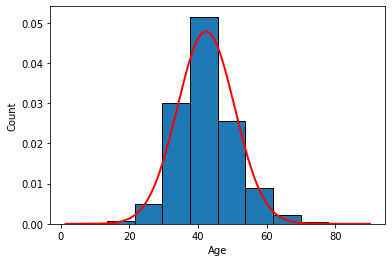

In [48]:
#Visualizations
#make histograms of age, inc, popn and superimpose normal distribution curve

plt.figure()
plt.hist(census["Median Age"], density=True, edgecolor = 'black')  
 
plt.xlabel("Age") #Assign x label 
plt.ylabel("Count") #Assign y label 

#superimposing normal curve - code refrenced from Stack Overflow
#https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 500)
p = norm.pdf(x, avg_age, sd_age)
plt.plot(x, p, 'k', linewidth=2, color='r')
plt.savefig("marvel_files/Age_distribution.png")
plt.show()

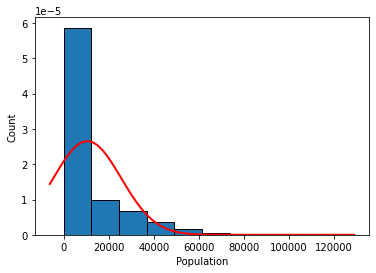

In [49]:
plt.figure()
plt.hist(census["Population"], density=True, edgecolor = 'black')
#plt.title("Population") #Assign title 
plt.xlabel("Population") #Assign x label 
plt.ylabel("Count") #Assign y label 

#normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 500)
p_pop = norm.pdf(x, avg_pop, sd_pop)
plt.plot(x, p_pop, 'k', linewidth=2, color='r')
plt.savefig("marvel_files/Population_distribution.png")
plt.show()

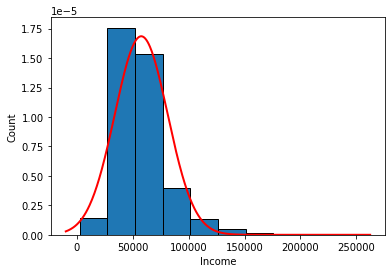

In [50]:
plt.figure()
plt.hist(census["Household Income"], density=True, edgecolor = 'black')
#plt.title("Income") #Assign title 
plt.xlabel("Income") #Assign x label 
plt.ylabel("Count") #Assign y label 
#normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 500)
p_inc = norm.pdf(x, avg_inc, sd_inc)
plt.plot(x, p_inc, 'k', linewidth=2, color='r')
plt.savefig("marvel_files/Income_distribution.png")
plt.show()

***Insight:*** After analyzing the data, along with industry research, a typical target market for movie release will have a median age of 30, population of 10,500 (mean of the dataset) and household income of $57,600 (mean of the dataset)

### Opening Weekend Release Locations

In [51]:
new_dataframe = pd.read_csv("marvel_files/new_dataframe.csv")
top_three_dataframe = pd.read_csv("marvel_files/top_three_dataframe.csv")

In [52]:
# Create a map using lat & long coordinates to set markers
# Create a Heatmap layers based on population, age, and income zscores
locations = new_dataframe[['lat', 'lng']].astype(float)
pzscore_pop = new_dataframe["zscore_pop"].astype(float)
pzscore_age = new_dataframe["zscore_age"].astype(float)
pzscore_inc = new_dataframe["zscore_inc"].astype(float)
fig = gmaps.figure()
fig
heat_layer_pop = gmaps.heatmap_layer(locations, weights=pzscore_pop, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
heat_layer_age = gmaps.heatmap_layer(locations, weights=pzscore_age, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
heat_layer_inc = gmaps.heatmap_layer(locations, weights=pzscore_inc, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig.add_layer(heat_layer_pop)
fig.add_layer(heat_layer_age)
fig.add_layer(heat_layer_inc )

fig

Figure(layout=FigureLayout(height='420px'))

In [53]:
# Using the template add the top 3 locations to the heatmap
info_box_template = """
<dl>
<dt>City</dt><dd>{city}</dd>
<dt>State</dt><dd>{state_id}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
top_three_labels = [info_box_template.format(**row) for index, row in top_three_dataframe.iterrows()]
locations = top_three_dataframe[["lat", "lng"]]

In [54]:
markers = gmaps.marker_layer(locations, info_box_content=top_three_labels)
# Add the layer to the map
fig.add_layer(heat_layer_pop)
fig.add_layer(heat_layer_age)
fig.add_layer(heat_layer_inc )
fig.add_layer(markers)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

***Analysis:*** Based on our calculations, the top 3 cities with the highest combined z-scores (closest to one) were: Sioux Falls, SD; Page, AZ; and Gonzales, CA. This was a surprising conclusion as we were expecting populous metros (like NY, LA, Chicago) to come up with the highest scores. We attribute this to using an absolute number for age, as opposed to the mean.

Based on these results, we think that we would need a better dataset for demographics to properly answer our question.